In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [ ]:
import nibabel as nib
import pandas as pd
import numpy as np
from os.path import join, dirname, isdir, isfile, basename, exists
from glob import glob
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
yoked = pd.read_excel('../../onsetdir/CON_yoked_table.xlsx')
yoked = yoked.query('use == 1').reset_index()

In [8]:
beta_path = '../../dataset/results_ShockCensored/{subj}/{group}lable/splitted_regs_deconv/{subj}_{cond}_bucket.nii.gz'

Pessoa_Lab = '/data/bswift-1/Pessoa_Lab'
eCON = join(Pessoa_Lab,'eCON')
EMO1 = join(Pessoa_Lab,'EMO1')

ROIs = {join(eCON,'ROI_masks/ROI_analysis_mask.nii.gz'):[('Left Hippocampus',11),('Right Hippocampus',12),
                                              ('Right Dorsal Anterior Insula',18),
                                              ('Right Ventral Anterior Insula',17),
                                              ('Left BNST',15),('Right BNST',16),
                                              ('Left Habenula',13),('Right Habenula',14)],
       join(eCON,'ROI_masks/from_emoprox1/vmPFC_PCC_masks.nii.gz'):[('vmPFC',1),('PCC',2)],
       join(eCON,'ROI_masks/ROI_Amygdala.nii.gz'):[('Right Amygdala',1),
                                                   ('Left Amygdala',2)],
       join(eCON,'ROI_masks/Ezra_PAG_ROI_2mm_SNR25.nii.gz'):[('Right PAG',1),('Left PAG',2)],
       join(EMO1,'ROIs/sign25vs75_P0.001_20vox_mask.nii.gz'):[('Right Amygdala (Version 3)',28),
                                                              ('PAG (Version 3)',44),
                                                              ('Anterior Insula (functional)',10)],
       join(EMO1,'ROIs/PCC_masks.nii.gz'):[('PCC (Version 2)',1)],
       join(eCON,'ROI_masks/from_emoprox1/PAG_Amygdala.nii.gz'):[('PAG (Version 2)',1),
                                                                 ('Right Amygdala (Version 2)',2)],
       join(eCON,'ROI_masks/Amygdala_CeME_R.nii.gz'):[('Right Central Amgdala',1)],
       join(eCON,'ROI_masks/Amygdala_CeME_L.nii.gz'):[('Left Central Amygdala',1)],
       join(EMO1,'ROIs/proximity25vs75_mask.nii.gz'):[('Mid-Cingulate',13)],
       join(eCON,'ROI_masks/anterior_cingulate_Neurosynth_mask.nii.gz'):[('Anterior Cingulate',1)],
       join(eCON,'ROI_masks/from_emoprox1/emoprox1_Deen_L-dAI.nii.gz'):[('Left Dorsal Anterior Insula',1)],
       join(eCON,'ROI_masks/from_emoprox1/emoprox1_Deen_L-vAI.nii.gz'):[('Left Ventral Anterior Insula',1)]}

In [10]:
if exists('PerSubjApprRetrResp.csv'):
    main_df = pd.read_csv('PerSubjApprRetrResp.csv')
else:
    main_df = pd.DataFrame()
    MNI_gm = nib.load(join(Pessoa_Lab,'share/templates/MNI152_T1_2mm_brain_GM_02182017.nii.gz')).get_data()

    for j,row in yoked.iterrows():
        for group in ['uncontrol','control']:
            subj = row[group]
            print('Processing {}....'.format(subj))
            for cond in 'appr retr'.split():
                betas = nib.load(beta_path.format(subj=subj,group=group,cond=cond)).get_data().squeeze()[:,:,:,1:42:2]
                for maskpath in ROIs.keys():
                    mask = nib.load(maskpath).get_data()
                    for roi in ROIs[maskpath]:
                        name, i = roi
                        resp=betas[(mask==i) & (MNI_gm == 1)].mean(axis=0)
                        tmp=pd.DataFrame([(np.arange(resp.shape[0]))*1.25, np.arange(resp.shape[0]), resp],
                                         index=['Time','TR','Response']).T
                        tmp['Subject'] = subj
                        tmp['Group'] = group
                        tmp['Pair'] = j
                        tmp['ROI'] = name
                        tmp['Condition'] = cond

                        main_df = pd.concat([main_df,tmp],axis =0)
    main_df[['Group','Pair','Subject','ROI','Condition','TR','Time','Response']].to_csv('PerSubjApprRetrResp.csv',index=False)

Processing CON031....
Processing CON001....
Processing CON021....
Processing CON002....
Processing CON022....
Processing CON003....
Processing CON030....
Processing CON004....
Processing CON023....
Processing CON005....
Processing CON025....
Processing CON006....
Processing CON016....
Processing CON007....
Processing CON053....
Processing CON008....
Processing CON052....
Processing CON009....
Processing CON089....
Processing CON010....
Processing CON020....
Processing CON011....
Processing CON033....
Processing CON012....
Processing CON019....
Processing CON013....
Processing CON084....
Processing CON014....
Processing CON027....
Processing CON015....
Processing CON049....
Processing CON017....
Processing CON028....
Processing CON018....
Processing CON026....
Processing CON024....
Processing CON054....
Processing CON029....
Processing CON034....
Processing CON032....
Processing CON036....
Processing CON035....
Processing CON058....
Processing CON037....
Processing CON056....
Processing

In [42]:
betas[(mask==i) & (MNI_gm == 1)].mean(axis=0).shape

(21,)

In [44]:
nib.load(beta_path.format(subj=subj,group=group,cond=cond)).get_data().squeeze()[:,:,:,1:42:2].shape

(91, 109, 91, 21)

In [40]:
beta_path.format(subj=subj,group=group,cond=cond)

'../../dataset/results_ShockCensored/CON122/controllable/splitted_regs_deconv/CON122_retr_bucket.nii.gz'

In [13]:
main_df.head()

,Time,TR,Response,Subject,Group,Pair,ROI,Condition
0,0.00,0.0,0.277159,CON031,uncontrol,0,Left Hippocampus,appr
1,1.25,1.0,0.342135,CON031,uncontrol,0,Left Hippocampus,appr
2,2.50,2.0,0.228538,CON031,uncontrol,0,Left Hippocampus,appr
3,3.75,3.0,0.292123,CON031,uncontrol,0,Left Hippocampus,appr
4,5.00,4.0,0.284274,CON031,uncontrol,0,Left Hippocampus,appr


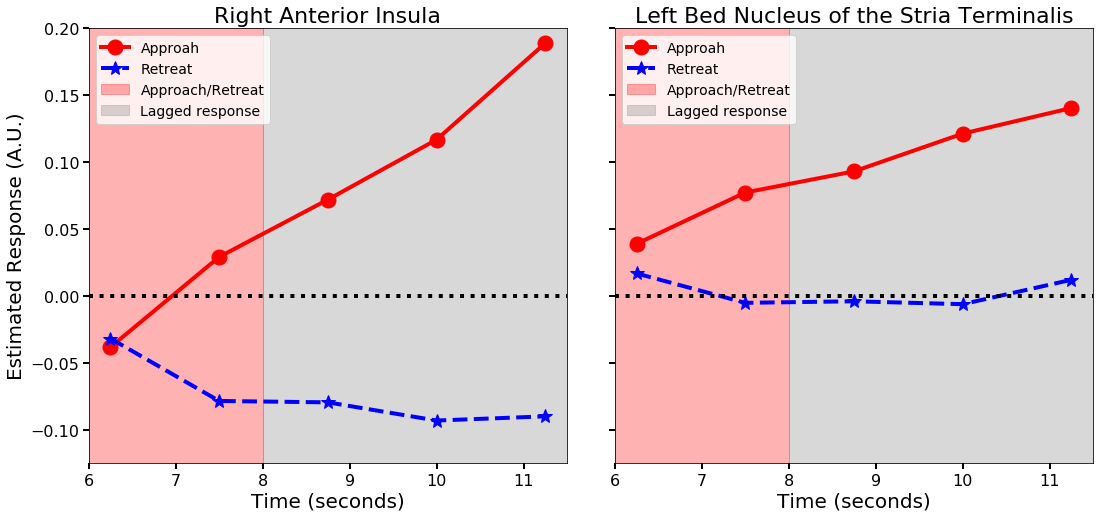

In [49]:
names = ['Right Anterior Insula', 'Left Bed Nucleus of the Stria Terminalis']

fig, axes = plt.subplots(ncols=2,sharey=True,figsize=(18,8))
plt.subplots_adjust(wspace=0.1, hspace=0)
time = main_df['Time'].unique()
for i,roi in enumerate(['Anterior Insula (functional)','Left BNST']):
    sub_df = main_df[(main_df['ROI'] == roi) & (main_df['Group']=='uncontrol')]
    mean_df = sub_df.groupby(['Group','Condition','Time'])['Response'].mean().to_frame().reset_index()
    approach = mean_df['Response'][mean_df['Condition']=='appr'].values
    retreat = mean_df['Response'][mean_df['Condition']=='retr'].values
    axes[i].plot(time[5:10],approach[5:10],linestyle='-',color='red',linewidth=4, marker='o', markersize = 15, label = 'Approah')
    axes[i].plot(time[5:10],retreat[5:10],linestyle='--',color='blue',linewidth=4, marker='*', markersize = 15, label = 'Retreat')
    axes[i].axvspan(time[3], 8, alpha = 0.3, color = 'r', label='Approach/Retreat')
    axes[i].axvspan(8,12, alpha = 0.3, color = 'gray',label='Lagged response')
    axes[i].axhline(0,linestyle=':',color='black',linewidth = 4)
    axes[i].set_ylim(-0.125,0.2)
    axes[i].set_xlim(6,11.5)
    axes[i].tick_params(direction='out', length=6, width=2, colors='k', labelsize=16)
    axes[i].legend(loc=2,prop={'size': 14})
    axes[i].set_title(names[i],fontsize=22)
    axes[i].set_xlabel('Time (seconds)',fontsize=20)
    if i == 0:
        axes[i].set_ylabel('Estimated Response (A.U.)',fontsize=20)
    #fig.legend(axes[0].get_legend_handles_labels()[1],loc=7,prop={'size': 14})
    #fig.savefig('figures/rAI and lBNST estimates resp.png',dpi=300)
    